In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,298.0,54.244966,9.079358,29.0,47.00,55.00,61.0,77.0
sex,298.0,0.687919,0.464122,0.0,0.00,1.00,1.0,1.0
cp,298.0,0.966443,1.034204,0.0,0.00,1.00,2.0,3.0
trtbps,298.0,131.023490,16.566247,94.0,120.00,130.00,140.0,180.0
chol,298.0,244.302013,47.831805,126.0,211.00,240.00,273.0,417.0
fbs,298.0,0.144295,0.351980,0.0,0.00,0.00,0.0,1.0
restecg,298.0,0.536913,0.525748,0.0,0.00,1.00,1.0,2.0
thalachh,298.0,149.500000,22.916662,71.0,133.25,152.50,166.0,202.0
exng,298.0,0.325503,0.469351,0.0,0.00,0.00,1.0,1.0
oldpeak,298.0,1.019463,1.142634,0.0,0.00,0.75,1.6,6.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [8]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
df['sex'].value_counts().shape[0]
for i in list(df.columns):
    print("{}--{}".format(i, df[i].value_counts().shape[0]))


age--41
sex--2
cp--4
trtbps--49
chol--152
fbs--2
restecg--3
thalachh--91
exng--2
oldpeak--40
slp--3
caa--5
thall--4
output--2


In [12]:
categorical_list=["sex", "cp", "fbs", "restecg", "exng", "slp", "caa", "thall","output"]

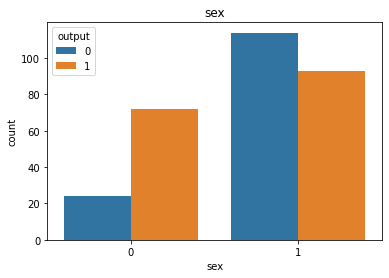

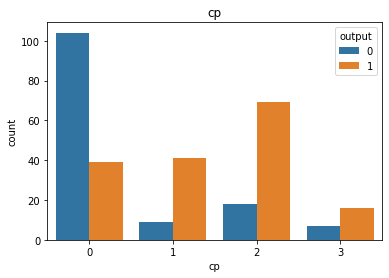

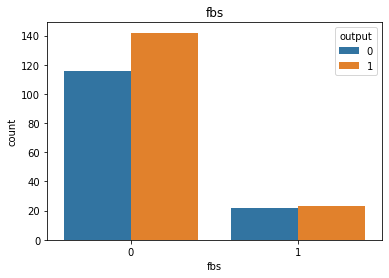

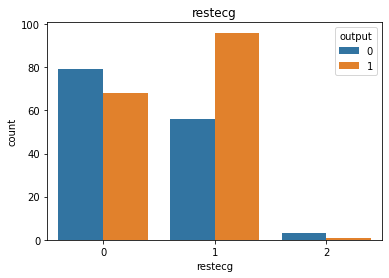

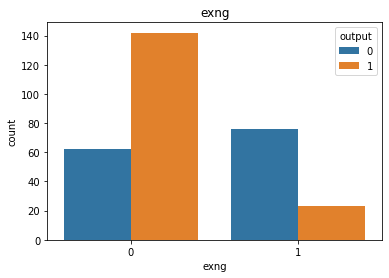

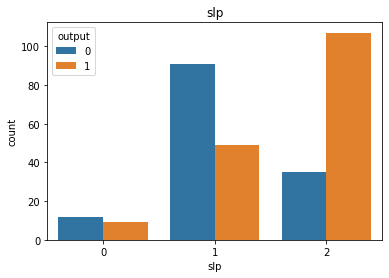

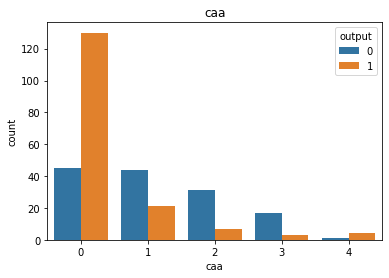

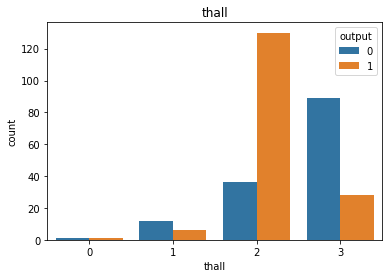

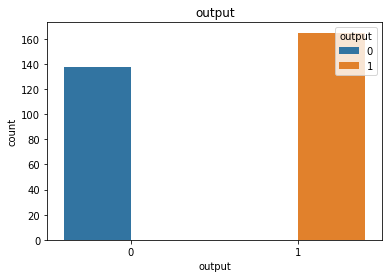

In [13]:
df_categoric=df.loc[:,categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i, data=df_categoric, hue="output")
    plt.title(i)

In [15]:
numeric_list=["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]

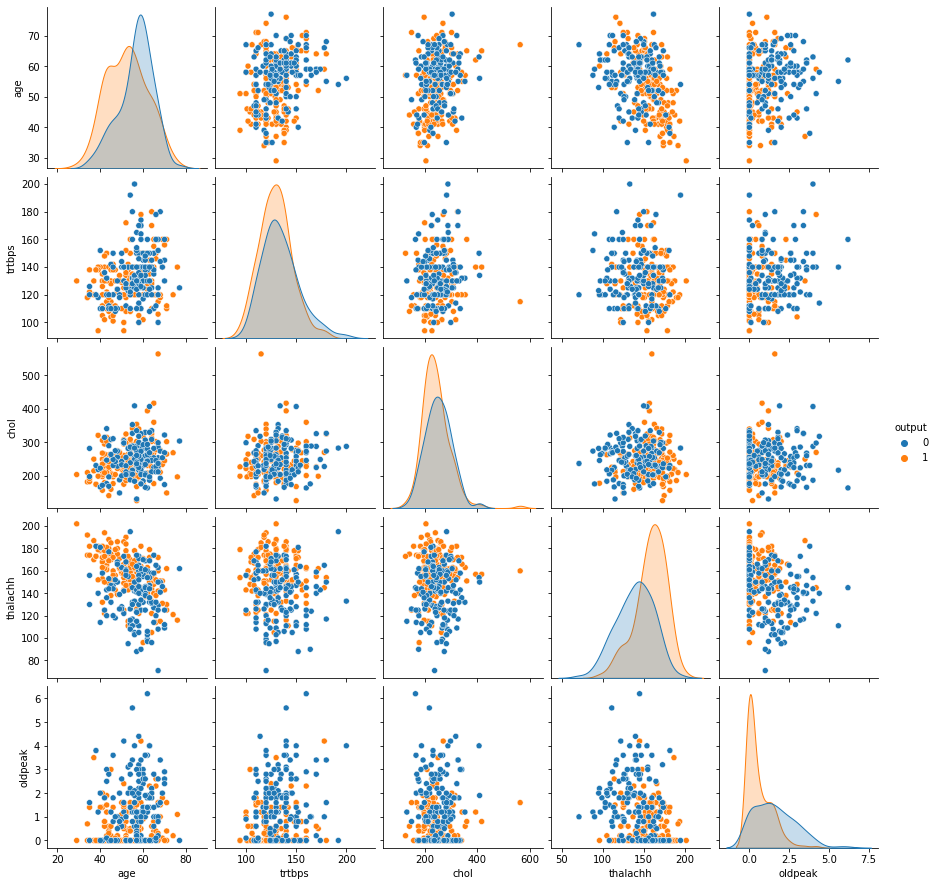

In [16]:
df_numeric=df.loc[:,numeric_list]
sns.pairplot(df_numeric,hue="output", diag_kind="kde")
plt.show()

In [17]:
scaler=StandardScaler()
scaler

StandardScaler()

In [18]:
scaled_array=scaler.fit_transform(df[numeric_list[:-1]])

In [19]:
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [20]:
pd.DataFrame(scaled_array).describe().T

,count,mean,std,min,25%,50%,75%,max
0,303.0,5.825923e-17,1.001654,-2.797624,-0.757280,0.069886,0.731619,2.496240
1,303.0,-7.146832e-16,1.001654,-2.148802,-0.663867,-0.092738,0.478391,3.905165
2,303.0,-9.828955e-17,1.001654,-2.324160,-0.681494,-0.121055,0.545674,6.140401
3,303.0,-5.203025e-16,1.001654,-3.439267,-0.706111,0.146634,0.715131,2.289429
4,303.0,-3.140136e-16,1.001654,-0.896862,-0.896862,-0.206705,0.483451,4.451851


In [21]:
df_dummy=pd.DataFrame(scaled_array, columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [22]:
df_dummy=pd.concat([df_dummy, df.loc[:,"output"]], axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [23]:
data_melted=pd.melt(df_dummy, id_vars="output", var_name="features", value_name="value")
data_melted.head(20)

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
5,1,age,0.290464
6,1,age,0.180175
7,1,age,-1.143291
8,1,age,-0.260980
9,1,age,0.290464


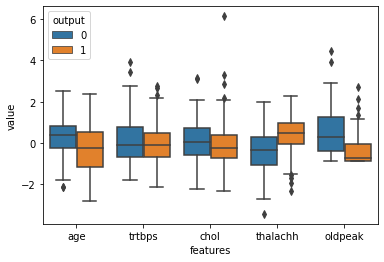

In [24]:
plt.figure()
sns.boxplot(x="features", y="value", hue="output", data=data_melted)
plt.show()

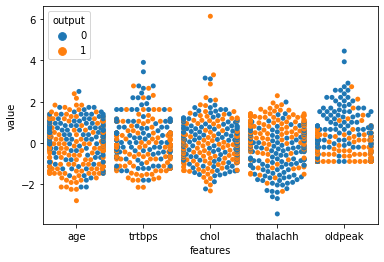

In [25]:
plt.figure()
sns.swarmplot(x="features", y="value", hue="output", data=data_melted)
plt.show()

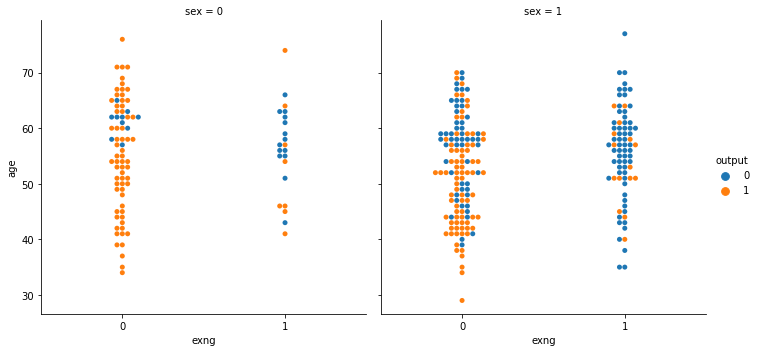

In [26]:
sns.catplot(x="exng", y="age", hue="output", col="sex", kind="swarm", data=df)
plt.show()


In [27]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


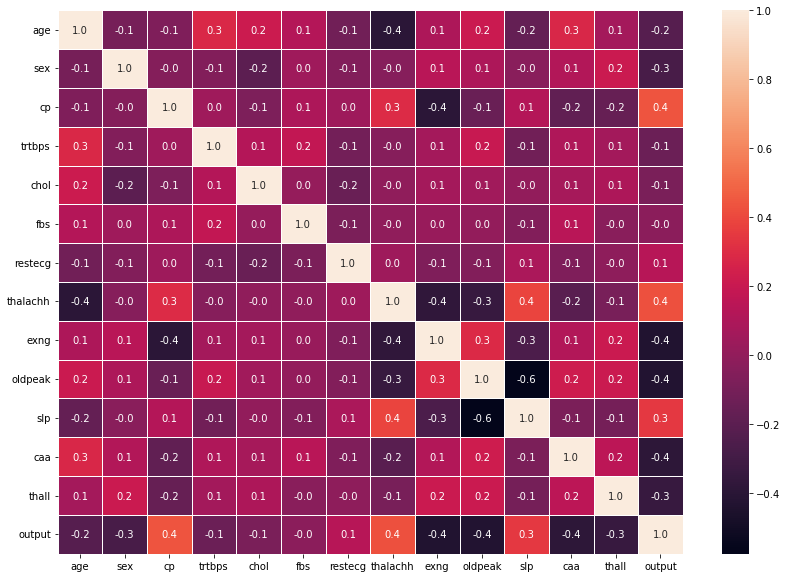

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f", linewidths=.7)
plt.show()

In [29]:
numeric_list=["age", "trtbps", "chol", "thalachh", "oldpeak"]
df_numeric=df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [30]:
df_numeric.describe()

,age,trtbps,chol,thalachh,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


In [31]:
for i in numeric_list:
   
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)
    
    IQR=Q3-Q1
    print("Old Shape:",df.loc[:,i].shape)

    upper=np.where(df.loc[:,i]>= (Q3+2.5*IQR))

    lower=np.where(df.loc[:,i]<= (Q1-2.5*IQR))
    
    print("{}--{}".format(upper,lower))
    
    
    try:

        df.drop(upper[0], inplace=True)
    except: print("KeyError:{} not found in axis". format(upper[0]))
    
    try:

        df.drop(lower[0], inplace=True)
    except: print("KeyError:{} not found in axis". format(lower[0]))
        
    print("New shape: ", df.shape)


Old Shape: (303,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New shape:  (303, 14)
Old Shape: (303,)
(array([223, 248]),)--(array([], dtype=int64),)
New shape:  (301, 14)
Old Shape: (301,)
(array([85]),)--(array([], dtype=int64),)
New shape:  (300, 14)
Old Shape: (300,)
(array([], dtype=int64),)--(array([], dtype=int64),)
New shape:  (300, 14)
Old Shape: (300,)
(array([203, 220]),)--(array([], dtype=int64),)
New shape:  (298, 14)


In [32]:
df1=df.copy()

In [33]:
df1=pd.get_dummies(df1,columns=categorical_list[:-1],drop_first=True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [34]:
X=df1.drop(["output"],axis=1)
y=df1[["output"]]

In [35]:
X.head()


,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [36]:
y.head()

,output
0,1
1,1
2,1
3,1
4,1


In [37]:
scaler=StandardScaler()
scaler

StandardScaler()

In [38]:
X[numeric_list[:-1]]=scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,0.965901,0.845093,-0.236684,0.021855,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,-1.902555,-0.061886,0.119326,1.639116,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-1.461254,-0.061886,-0.843995,0.983470,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.193624,-0.666538,-0.173859,1.245729,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0.303950,-0.666538,2.297269,0.590082,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=3)
print("X_train: {}".format(X_train.shape))
print("X_test: {}".format(X_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

X_train: (268, 22)
X_test: (30, 22)
y_train: (268, 1)
y_test: (30, 1)


In [40]:
logreg=LogisticRegression()
logreg

LogisticRegression()

In [41]:
logreg.fit(X_train,y_train)

LogisticRegression()

In [42]:
y_pred_prob=logreg.predict_proba(X_test)
y_pred_prob

array([[0.94252608, 0.05747392],
       [0.06987766, 0.93012234],
       [0.11254982, 0.88745018],
       [0.47977949, 0.52022051],
       [0.08754891, 0.91245109],
       [0.01966602, 0.98033398],
       [0.01313076, 0.98686924],
       [0.25608762, 0.74391238],
       [0.93025651, 0.06974349],
       [0.04680322, 0.95319678],
       [0.95711862, 0.04288138],
       [0.01124265, 0.98875735],
       [0.41858447, 0.58141553],
       [0.6057325 , 0.3942675 ],
       [0.02733085, 0.97266915],
       [0.0261538 , 0.9738462 ],
       [0.84053044, 0.15946956],
       [0.03593571, 0.96406429],
       [0.86161159, 0.13838841],
       [0.97599523, 0.02400477],
       [0.6204125 , 0.3795875 ],
       [0.31203666, 0.68796334],
       [0.93491854, 0.06508146],
       [0.00474821, 0.99525179],
       [0.44481395, 0.55518605],
       [0.33837871, 0.66162129],
       [0.03945105, 0.96054895],
       [0.99154232, 0.00845768],
       [0.46749931, 0.53250069],
       [0.69698284, 0.30301716]])

In [43]:
y_pred = np.argmax(y_pred_prob,axis=1)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0])

In [44]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"]=y_pred
dummy_.head()

,0,1,y_pred
0,0.942526,0.057474,0
1,0.069878,0.930122,1
2,0.112550,0.887450,1
3,0.479779,0.520221,1
4,0.087549,0.912451,1


In [45]:
print("Test accuracy: {}".format(accuracy_score(y_pred,y_test)))

Test accuracy: 0.9


In [46]:
fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob[:,1])

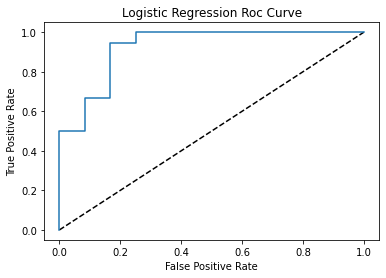

In [47]:
plt.plot([0,1],[0,1],"k--")#we drawed diagonal
plt.plot(fpr,tpr,label="Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression Roc Curve")
plt.show()

In [48]:
lr=LogisticRegression()
lr

LogisticRegression()

In [49]:
penalty=['l1','l2']
parameters = {"penalty": penalty}

In [50]:
lr_searcher=GridSearchCV(lr,parameters)
lr_searcher

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [51]:
print(lr.get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [52]:
lr_searcher.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2']})

In [53]:
print("Best parameters: ",lr_searcher.best_params_)

Best parameters:  {'penalty': 'l2'}


In [54]:
y_pred=lr_searcher.predict(X_test)

In [55]:
print("Test accuracy:  {}".format(accuracy_score(y_pred,y_test)))

Test accuracy:  0.9
